## This file finds geographically distinct species with lots of counts

In [ ]:
params_file = None
input_file = None
output_file = None
common_file = None

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
pd.options.mode.chained_assignment = None
print()

In [ ]:
print()
import json
with open(params_file) as f:
    data = json.load(f)
min_div = int(data['geography']['min_div_in_block'])
min_obs = int(data['geography']['min_obs_in_block'])
min_count = int(data['geography']['min_count_species'])
slices_per_lat = int(data['geography']['slices_per_lat']) + 1

In [ ]:
print()
# get the most abundant species
top_species = []
with open(common_file, 'r') as f:
    for line in f:
        top_species.append(line.strip())

# subset the metadata to remove the top species
meta = pd.read_csv(input_file)
meta = meta[~meta['primary_label'].isin(top_species)]

['mallar3',
 'norcar',
 'comsan',
 'gnwtea',
 'skylar',
 'dunlin',
 'bcnher',
 'houspa',
 'brnowl',
 'wesmea',
 'normoc',
 'houfin',
 'eurwig',
 'cangoo',
 'gwfgoo',
 'bkbplo',
 'gadwal',
 'rinphe',
 'osprey',
 'rorpar']

## Add geographically diverse species that are moderately abundant

(-180.0, 180.0)

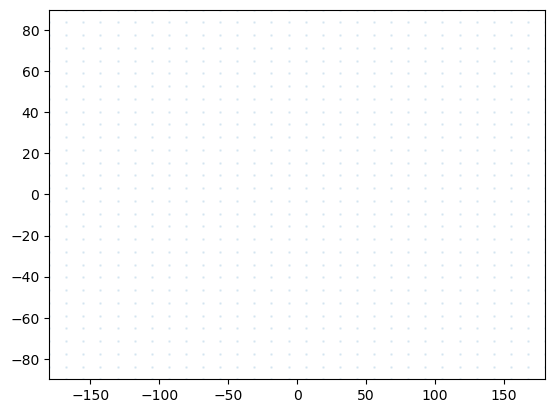

In [ ]:
print()
from itertools import product

longitudes = np.linspace(-180,180,slices_per_lat)
latitudes = np.linspace(-90,90,slices_per_lat)

coordinate_pairs = list(product(latitudes, longitudes))
coords = np.array(coordinate_pairs)
plt.plot(coords[:, 1], coords[:, 0], 'o', markersize=2, alpha=0.33, color='tab:blue')
plt.ylim(-90, 90)
plt.xlim(-180, 180)

In [ ]:

print()
# Create a figure with an axis
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# Add map features
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle='--')

# Set extent to the whole world
ax.set_extent([-180, 180, -90, 90])
plt.plot(meta['longitude'], meta['latitude'], 'o', markersize=1, alpha=0.1, color='tab:red')

# Define the grid size
lat_bins = np.linspace(-90, 90, slices_per_lat)  # latitude bins
lon_bins = np.linspace(-180, 180, slices_per_lat)  # longitude bins

# Assign each data point to a grid cell
meta['lat_bin'] = pd.cut(meta['latitude'], bins=lat_bins, labels=lat_bins[:-1])
meta['lon_bin'] = pd.cut(meta['longitude'], bins=lon_bins, labels=lon_bins[:-1])

# Group the data by grid cells
grouped_data = meta.groupby(['lat_bin', 'lon_bin'])

# Example: Access data for a specific grid cell
geographically_abundant = []
for (lat_bin, lon_bin), group in grouped_data:
    sz = group.shape[0]
    di = group['primary_label'].unique().shape[0]
    if sz > min_obs and di > min_div:
        most_abundant = group['primary_label'].value_counts().index.tolist()[0]
        geographically_abundant.append(most_abundant)
        plt.scatter(lon_bin, lat_bin, color='tab:green', s=25)

In [ ]:
print()
geo_abu = np.unique(geographically_abundant)
ga = meta[meta['primary_label'].isin(geo_abu)]
vc_indices = ga['primary_label'].value_counts().index.to_list()
vc_counts = ga['primary_label'].value_counts().values
with open(output_file, 'w') as f:
    for i in range(len(vc_indices)):
        if vc_counts[i] > min_count:
            item = vc_indices[i]
            f.write("%s\n" % item)

## Add some moderately abundant species in for island/isolated data

In [ ]:
print()
islands = []

meta = meta[~meta['primary_label'].isin(geo_abu)]

# New Zealand
subtable = meta[(meta['latitude']<-30)&(meta['latitude']>-50)&(meta['longitude']>160)&(meta['longitude']<180)]
most_abundant = subtable['primary_label'].value_counts().index.to_list()[:2]
islands += most_abundant

# Iceland
subtable = meta[(meta['latitude']<67)&(meta['latitude']>62)&(meta['longitude']>-25)&(meta['longitude']<-14)]
most_abundant = subtable['primary_label'].value_counts().index.to_list()[:2]
islands += most_abundant

# Australia
subtable = meta[(meta['latitude']<-10)&(meta['latitude']>-45)&(meta['longitude']>110)&(meta['longitude']<160)]
most_abundant = subtable['primary_label'].value_counts().index.to_list()[:2]
islands += most_abundant

# Svalbard
subtable = meta[(meta['latitude']<82)&(meta['latitude']>73)&(meta['longitude']>10)&(meta['longitude']<35)]
most_abundant = subtable['primary_label'].value_counts().index.to_list()[:2]
islands += most_abundant

# Taiwan
subtable = meta[(meta['latitude']<26)&(meta['latitude']>21)&(meta['longitude']>120)&(meta['longitude']<122)]
most_abundant = subtable['primary_label'].value_counts().index.to_list()[:2]
islands += most_abundant

# South Africa
subtable = meta[(meta['latitude']<-15)&(meta['latitude']>-35)&(meta['longitude']>15)&(meta['longitude']<35)]
most_abundant = subtable['primary_label'].value_counts().index.to_list()[:2]
islands += most_abundant

# South Africa
subtable = meta[(meta['latitude']<-15)&(meta['latitude']>-35)&(meta['longitude']>15)&(meta['longitude']<35)]
most_abundant = subtable['primary_label'].value_counts().index.to_list()[:2]
islands += most_abundant

# -stan
subtable = meta[(meta['latitude']<48)&(meta['latitude']>35)&(meta['longitude']>56)&(meta['longitude']<75)]
most_abundant = subtable['primary_label'].value_counts().index.to_list()[:2]
islands += most_abundant

# Indonesia-like
subtable = meta[(meta['latitude']<12)&(meta['latitude']>-8)&(meta['longitude']>90)&(meta['longitude']<140)]
most_abundant = subtable['primary_label'].value_counts().index.to_list()[:2]
islands += most_abundant

# Anchorage
subtable = meta[(meta['latitude']<65)&(meta['latitude']>59)&(meta['longitude']>-153)&(meta['longitude']<-146)]
most_abundant = subtable['primary_label'].value_counts().index.to_list()[:2]
islands += most_abundant

# Israel-like
subtable = meta[(meta['latitude']<35)&(meta['latitude']>25)&(meta['longitude']>33)&(meta['longitude']<37)]
most_abundant = subtable['primary_label'].value_counts().index.to_list()[:2]
islands += most_abundant

In [ ]:
print()
island_data = meta[meta['primary_label'].isin(np.unique(islands))]
island_data['primary_label'].value_counts()

vc_indices = island_data['primary_label'].value_counts().index.to_list()
vc_counts = island_data['primary_label'].value_counts().values
with open(output_file, 'a') as f:
    for i in range(len(vc_indices)):
        if vc_counts[i] > min_count:
            item = vc_indices[i]
            f.write("%s\n" % item)

: 